In [112]:
library(dplyr)   
library(caret)
library(tidyverse)
library(recipes)
library(pROC)
library(caTools)
library(UBL)

set.seed(1)




options(repr.plot.width = 20, repr.plot.height =10, repr.plot.res = 500)

load(file = "C:/Users/abonini/Desktop/Analysis/Sources/LIVERTRANSPLANT/Modello/df_finale.Rdata")

df <- df_finale


## Data partition

In [113]:
set.seed(1)


sample <- sample.split(df$deg_cat, SplitRatio = 0.7)
train  <- subset(df, sample == TRUE)
test   <- subset(df, sample == FALSE)


TestClasses <- test$deg_cat
TestData <- subset(test,select= -deg_cat)

In [114]:
prop.table(table(test$deg_cat))


     fast   NotFast 
0.3517442 0.6482558 

In [115]:
train <- SmoteClassif(deg_cat ~ ., train, k = 27, dist = "HEOM")

#view distribution of response variable in new dataset
table(train$deg_cat)

TrainClasses <- train$deg_cat
TrainData <- subset(train,select= -deg_cat)


   fast NotFast 
    401     402 

## Model

In [116]:
ctrl <- trainControl(method = "repeatedcv", 
                 number = 10, 
                 savePredictions = "final",classProbs=TRUE,verboseIter=TRUE, search= "random") 

#summaryFunction = multiClassSummary (to keep all metrics)

In [117]:
#Boosted Logistic Regression
model_logitBoost <- train(deg_cat ~ . , data = train,
               method = "LogitBoost", trControl = ctrl) 



+ Fold01.Rep1: nIter=65 
- Fold01.Rep1: nIter=65 
+ Fold02.Rep1: nIter=65 
- Fold02.Rep1: nIter=65 
+ Fold03.Rep1: nIter=65 
- Fold03.Rep1: nIter=65 
+ Fold04.Rep1: nIter=65 
- Fold04.Rep1: nIter=65 
+ Fold05.Rep1: nIter=65 
- Fold05.Rep1: nIter=65 
+ Fold06.Rep1: nIter=65 
- Fold06.Rep1: nIter=65 
+ Fold07.Rep1: nIter=65 
- Fold07.Rep1: nIter=65 
+ Fold08.Rep1: nIter=65 
- Fold08.Rep1: nIter=65 
+ Fold09.Rep1: nIter=65 
- Fold09.Rep1: nIter=65 
+ Fold10.Rep1: nIter=65 
- Fold10.Rep1: nIter=65 
Aggregating results
Selecting tuning parameters
Fitting nIter = 22 on full training set


In [118]:
#Regularized Logistic Regression
model_regLogistic <- train(deg_cat ~ . , data = train,
               method = "regLogistic",
               trControl = ctrl)    # metric = "..." ciò che voglio massimizzare

+ Fold01.Rep1: cost=  0.6100, loss=L1, epsilon=1 
- Fold01.Rep1: cost=  0.6100, loss=L1, epsilon=1 
+ Fold01.Rep1: cost=856.6932, loss=L1, epsilon=1 
- Fold01.Rep1: cost=856.6932, loss=L1, epsilon=1 
+ Fold01.Rep1: cost=  0.4271, loss=L2_dual, epsilon=1 
- Fold01.Rep1: cost=  0.4271, loss=L2_dual, epsilon=1 
+ Fold02.Rep1: cost=  0.6100, loss=L1, epsilon=1 
- Fold02.Rep1: cost=  0.6100, loss=L1, epsilon=1 
+ Fold02.Rep1: cost=856.6932, loss=L1, epsilon=1 
- Fold02.Rep1: cost=856.6932, loss=L1, epsilon=1 
+ Fold02.Rep1: cost=  0.4271, loss=L2_dual, epsilon=1 
- Fold02.Rep1: cost=  0.4271, loss=L2_dual, epsilon=1 
+ Fold03.Rep1: cost=  0.6100, loss=L1, epsilon=1 
- Fold03.Rep1: cost=  0.6100, loss=L1, epsilon=1 
+ Fold03.Rep1: cost=856.6932, loss=L1, epsilon=1 
- Fold03.Rep1: cost=856.6932, loss=L1, epsilon=1 
+ Fold03.Rep1: cost=  0.4271, loss=L2_dual, epsilon=1 
- Fold03.Rep1: cost=  0.4271, loss=L2_dual, epsilon=1 
+ Fold04.Rep1: cost=  0.6100, loss=L1, epsilon=1 
- Fold04.Rep1: cost=

## Results

Boosted Logistic Regression 

803 samples
 77 predictor
  2 classes: 'fast', 'NotFast' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 723, 723, 722, 723, 723, 723, ... 
Resampling results across tuning parameters:

  nIter  Accuracy   Kappa    
  22     0.7490761  0.4950909
  56     0.7354391  0.4685399
  65     0.7024074  0.4051147

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was nIter = 22.


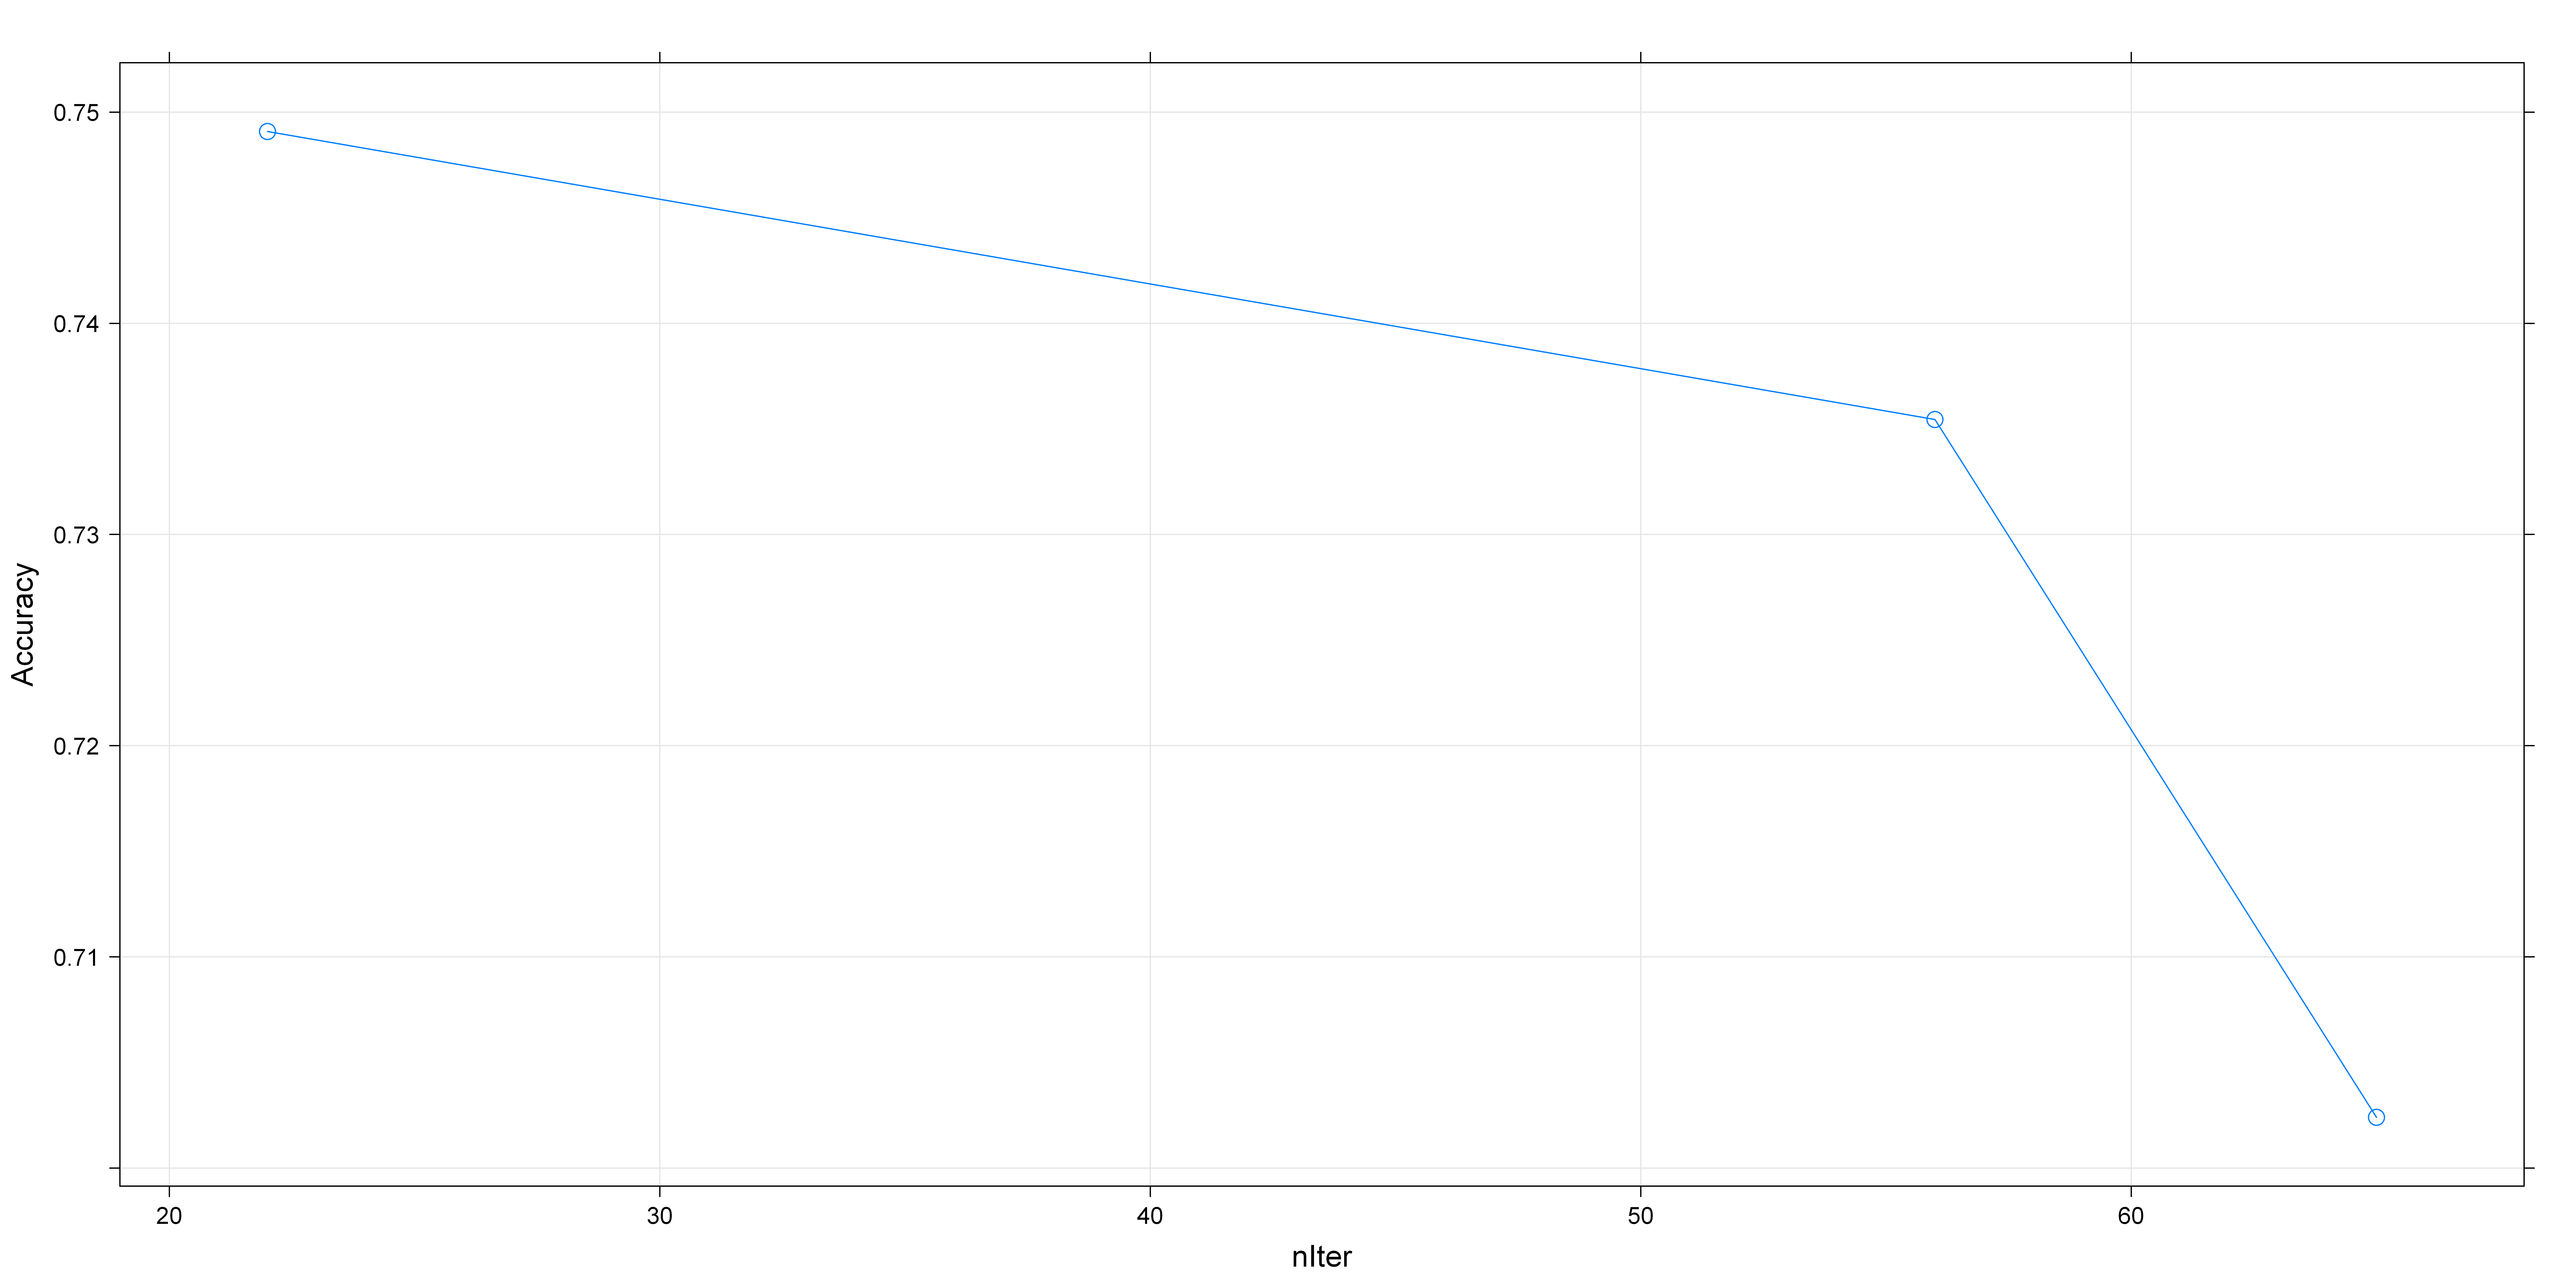

In [119]:
print(model_logitBoost)
plot(model_logitBoost,  cex= 1.5,  xlab = list( cex = 1.4), ylab = list( cex = 1.4), scales = list(x = list(cex=1.1),y=list(cex=1.1)))

Regularized Logistic Regression 

803 samples
 77 predictor
  2 classes: 'fast', 'NotFast' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 723, 722, 723, 722, 723, 723, ... 
Resampling results across tuning parameters:

  cost         loss     Accuracy   Kappa    
    0.4271184  L2_dual  0.7471759  0.4941981
    0.6099762  L1       0.7272068  0.4543510
  856.6931781  L1       0.7235340  0.4470147

Tuning parameter 'epsilon' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were cost = 0.4271184, loss = L2_dual
 and epsilon = 1.


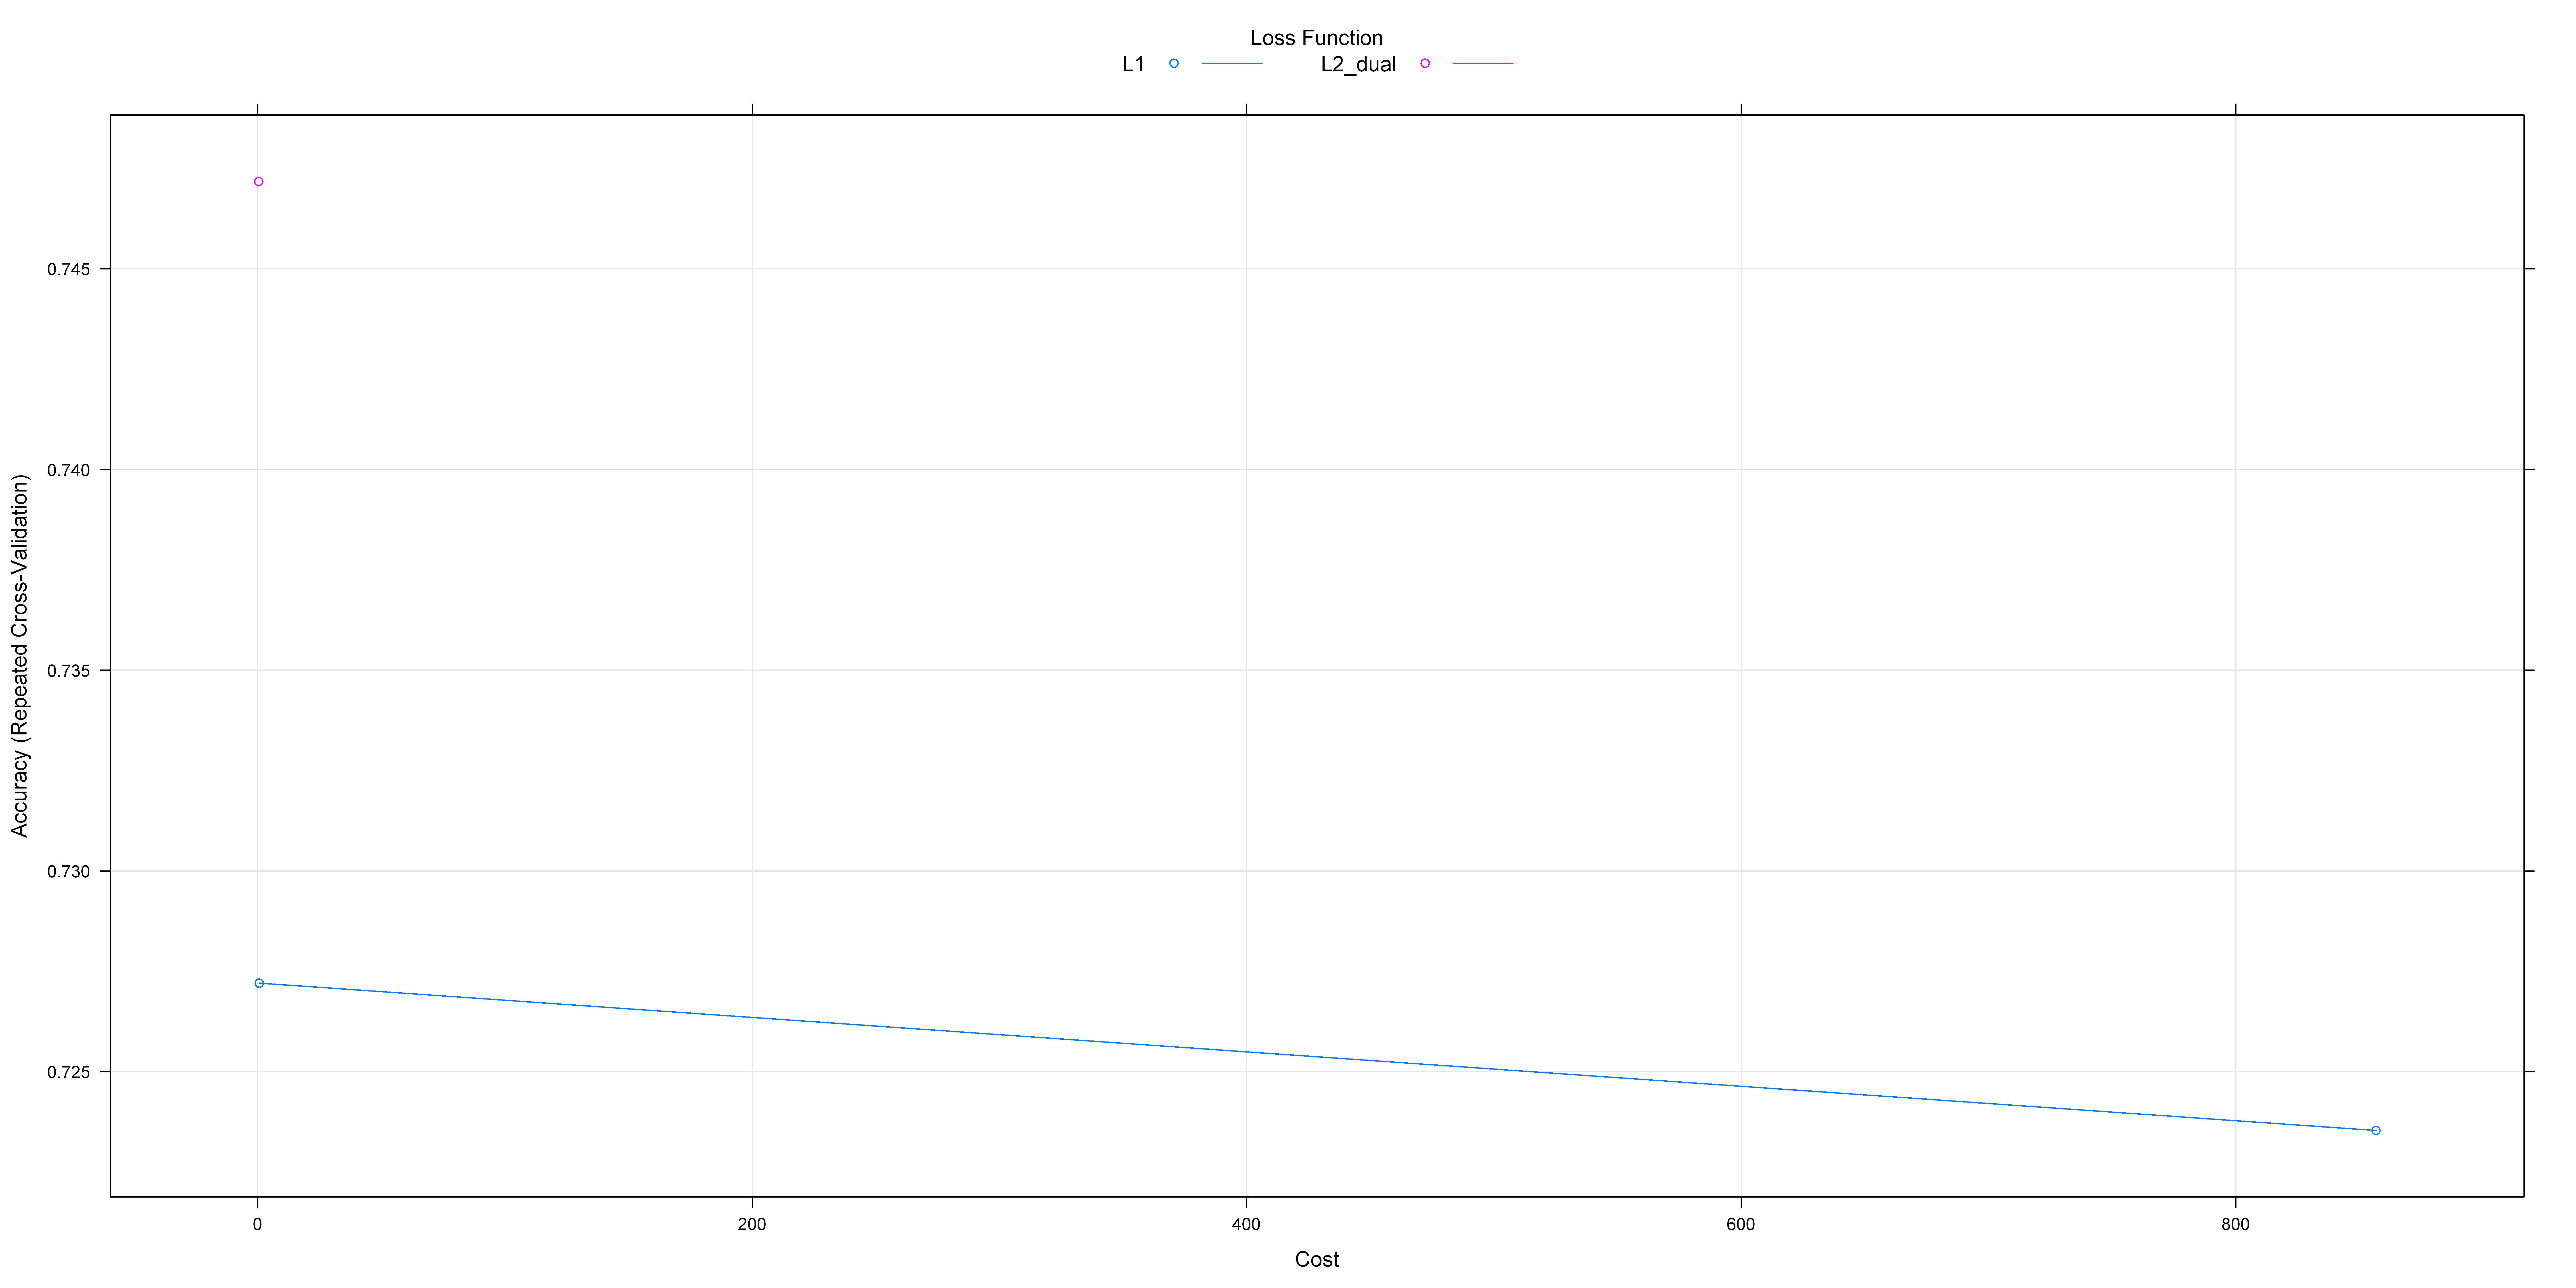

In [120]:
print(model_regLogistic)
plot(model_regLogistic)


Call:
summary.resamples(object = results)

Models: logitBoost, regLogistic 
Number of resamples: 10 

Accuracy 
                Min.   1st Qu.    Median      Mean   3rd Qu.  Max. NA's
logitBoost  0.640625 0.6929596 0.7284856 0.7490761 0.7897116 0.880    0
regLogistic 0.687500 0.7059028 0.7577160 0.7471759 0.7750000 0.825    0

Kappa 
                 Min.   1st Qu.    Median      Mean   3rd Qu. Max. NA's
logitBoost  0.2854369 0.3793621 0.4483153 0.4950909 0.5747601 0.76    0
regLogistic 0.3750000 0.4111951 0.5150382 0.4941981 0.5500000 0.65    0


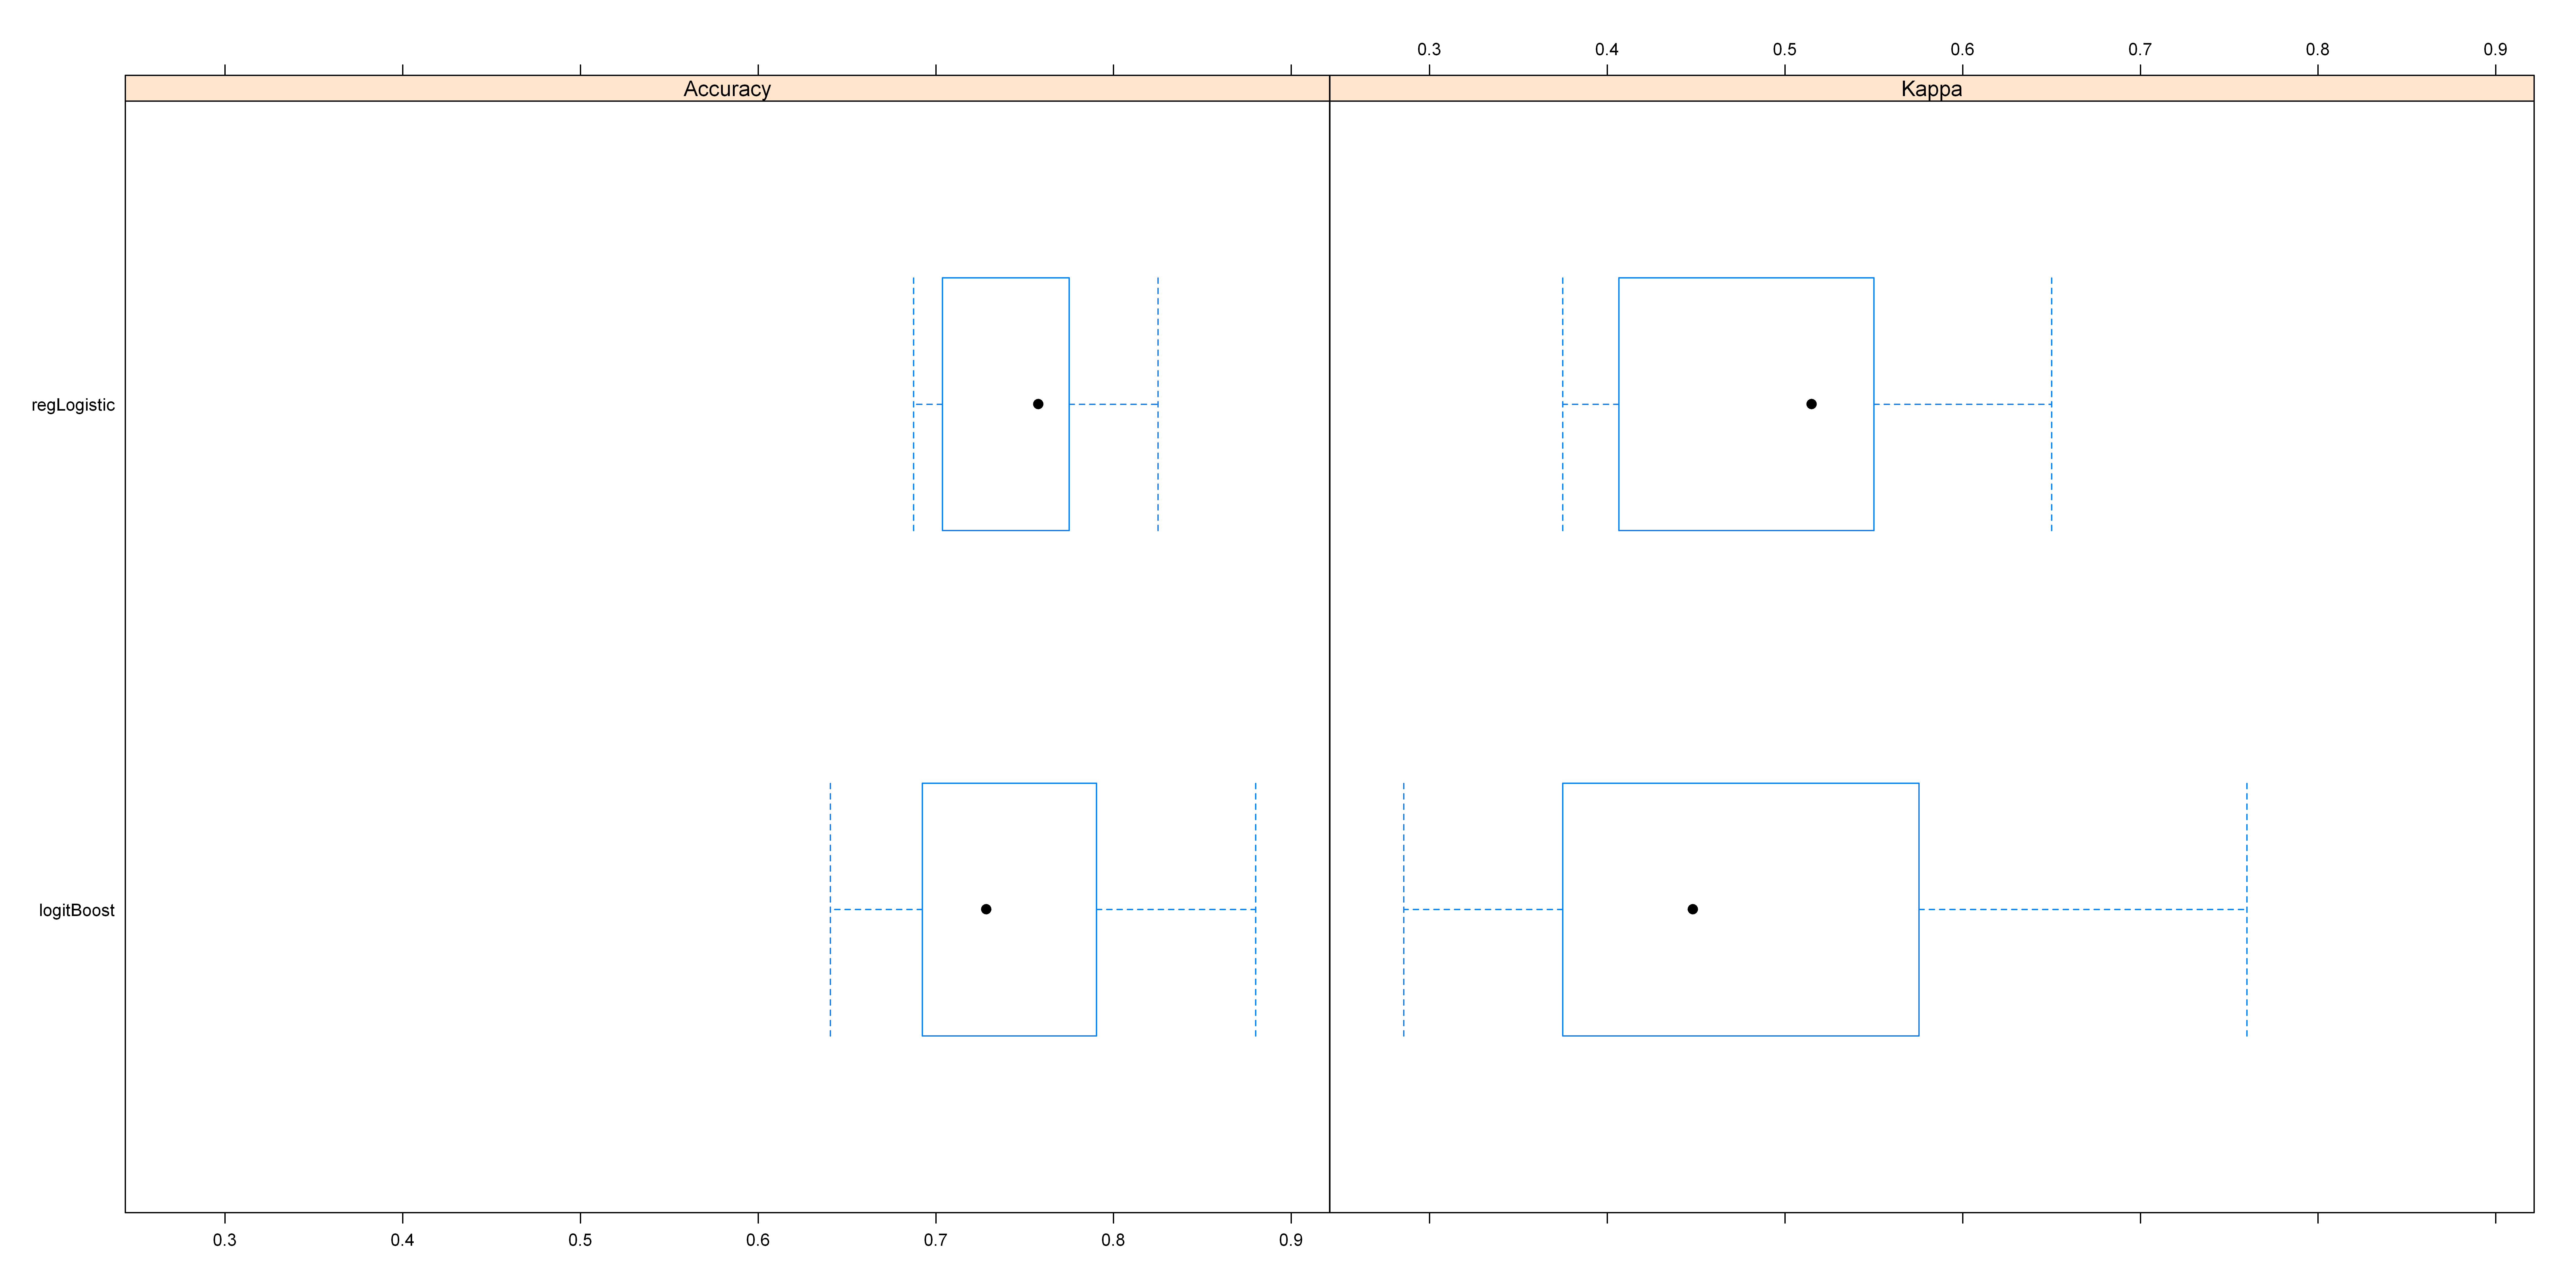

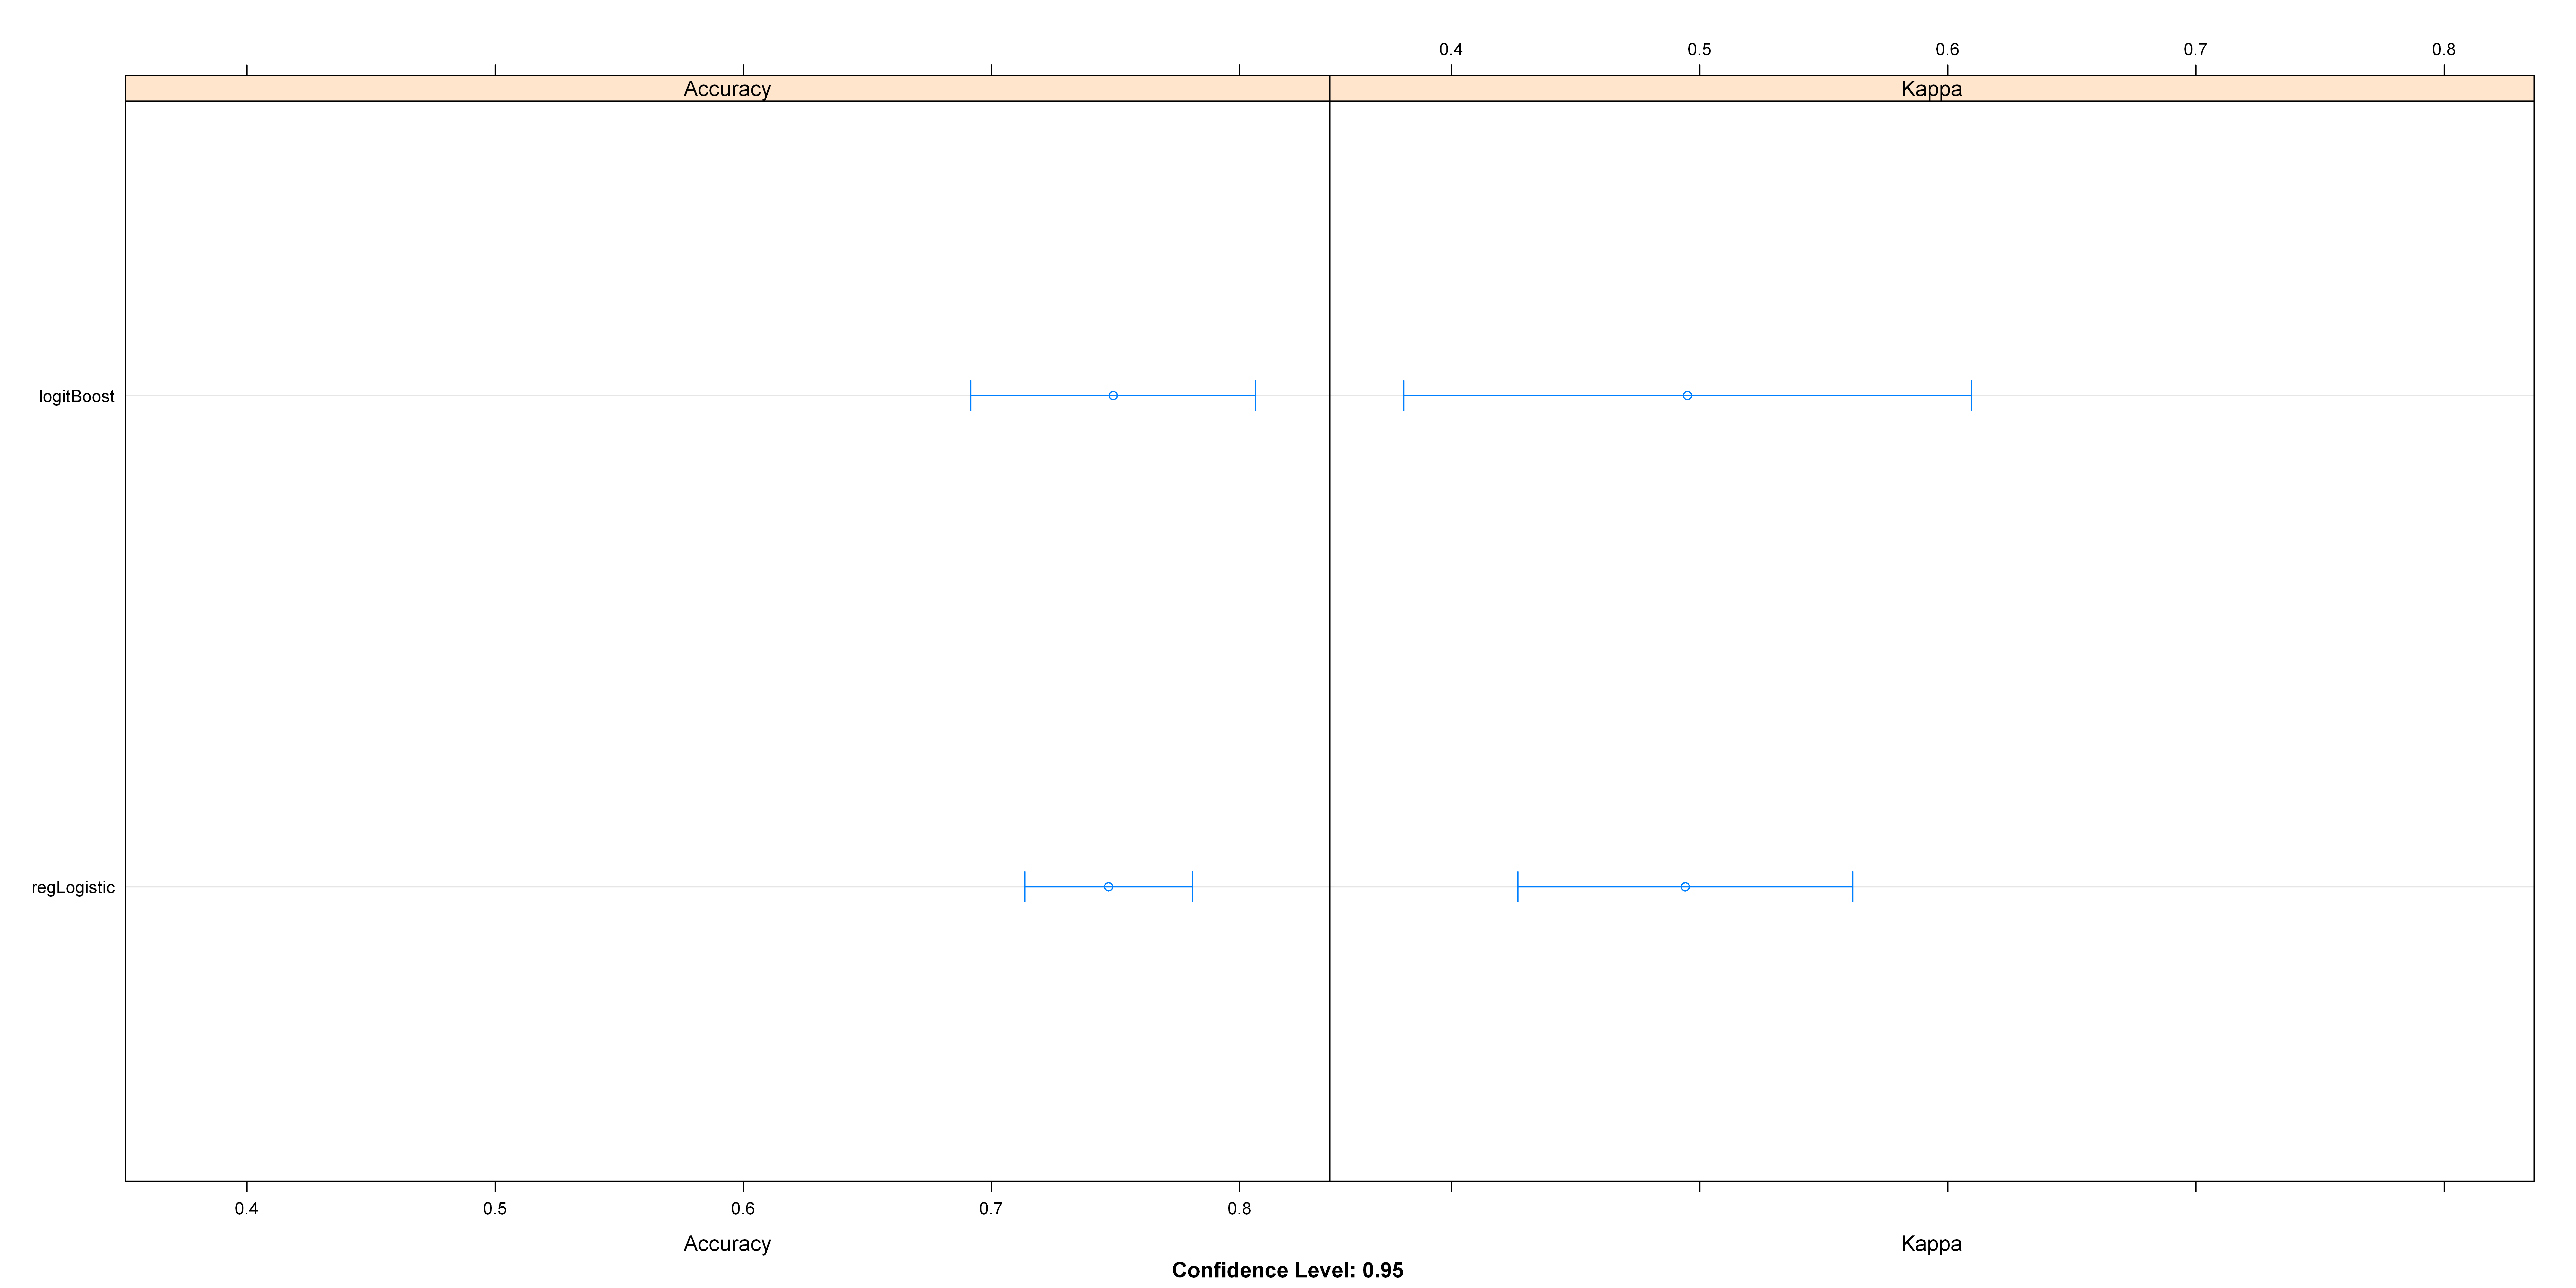

In [121]:
# collect resamples
results <- resamples(list(logitBoost=model_logitBoost,  regLogistic=model_regLogistic))
# summarize the distributions
summary(results)
# boxplots of results
bwplot(results)
# dot plots of results
dotplot(results)

## Prediction

In [122]:
pred_logitBoost <- predict(model_logitBoost,test)   # 53 acc
pred_logitBoost.prob <- predict(model_logitBoost,test, type="prob")


result <- confusionMatrix(TestClasses,  pred_logitBoost) 
result
result$byClass

Confusion Matrix and Statistics

          Reference
Prediction fast NotFast
   fast      71      31
   NotFast   46     125
                                          
               Accuracy : 0.7179          
                 95% CI : (0.6606, 0.7705)
    No Information Rate : 0.5714          
    P-Value [Acc > NIR] : 3.992e-07       
                                          
                  Kappa : 0.4148          
                                          
 Mcnemar's Test P-Value : 0.1106          
                                          
            Sensitivity : 0.6068          
            Specificity : 0.8013          
         Pos Pred Value : 0.6961          
         Neg Pred Value : 0.7310          
             Prevalence : 0.4286          
         Detection Rate : 0.2601          
   Detection Prevalence : 0.3736          
      Balanced Accuracy : 0.7041          
                                          
       'Positive' Class : fast            
               

Sensitivity          Specificity       Pos Pred Value 
           0.6068376            0.8012821            0.6960784 
      Neg Pred Value            Precision               Recall 
           0.7309942            0.6960784            0.6068376 
                  F1           Prevalence       Detection Rate 
           0.6484018            0.4285714            0.2600733 
Detection Prevalence    Balanced Accuracy 
           0.3736264            0.7040598

direction: in which direction to make the comparison? “auto” (default for univariate curves): automatically define in which group the median is higher and take the direction accordingly. Not available for multivariate curves. “>” (default for multivariate curves): if the predictor values for the control group are higher than the values of the case group (controls > t >= cases). “<”: if the predictor values for the control group are lower or equal than the values of the case group (controls < t <= cases).

Setting levels: control = fast, case = NotFast

Setting direction: controls < cases



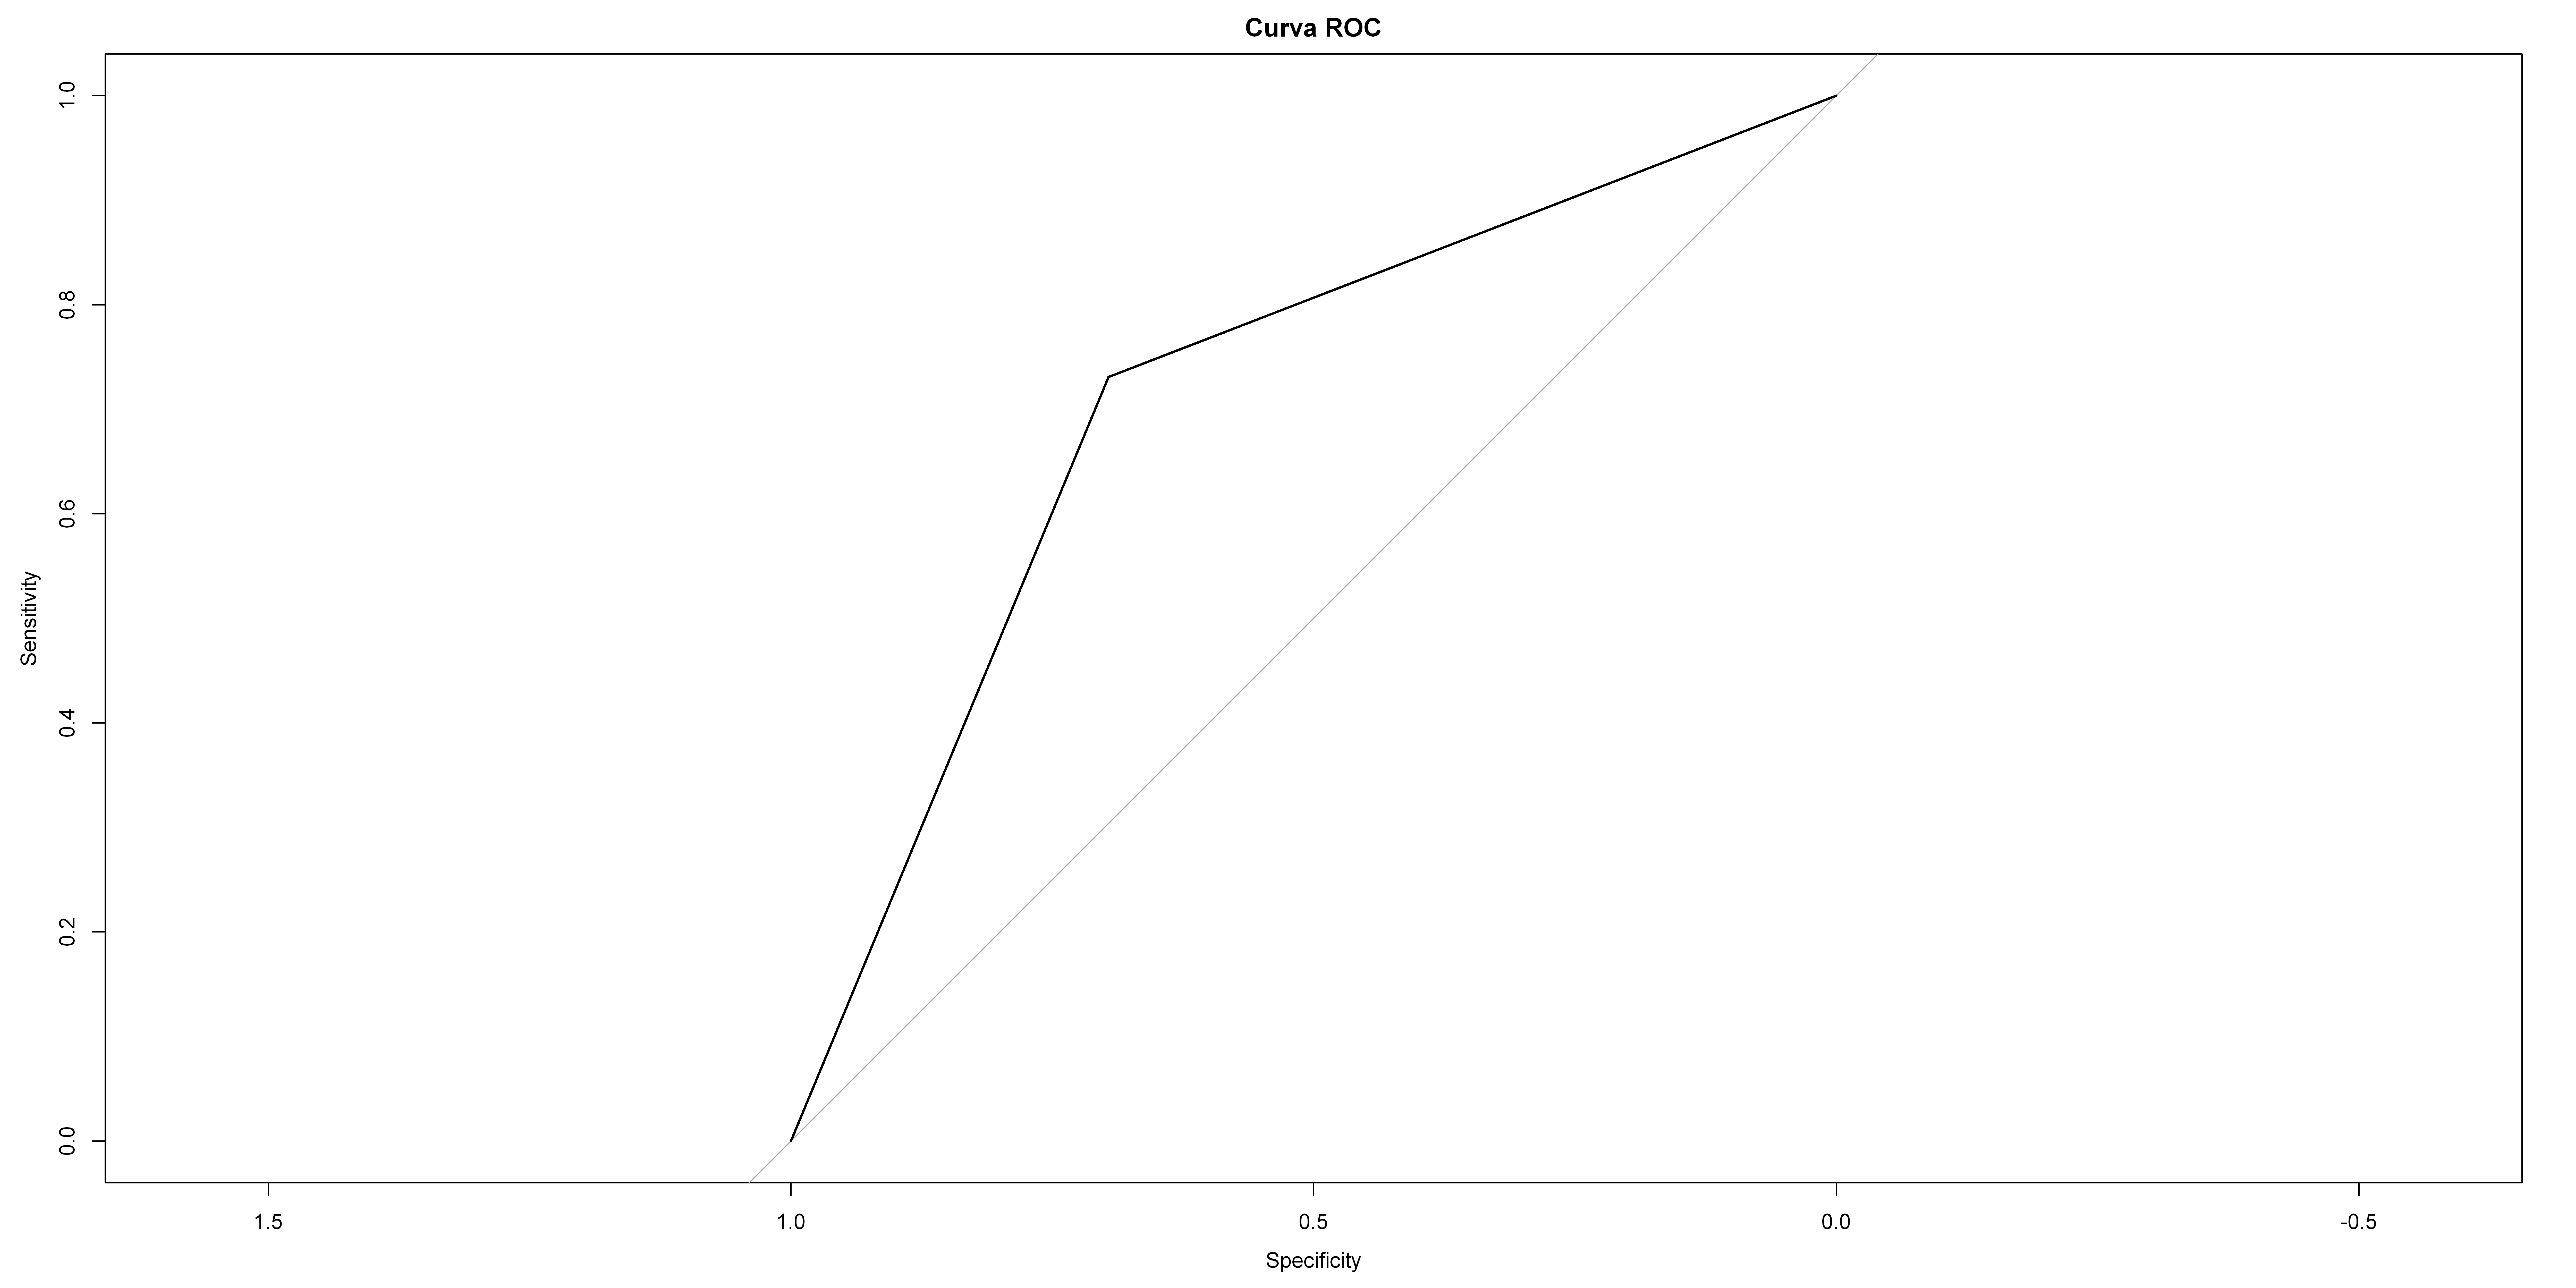

In [123]:
roc_obj <- roc(TestClasses, as.numeric(pred_logitBoost))
plot(roc_obj, main="Curva ROC")

In [124]:
roc_obj


Call:
roc.default(response = TestClasses, predictor = as.numeric(pred_logitBoost))

Data: as.numeric(pred_logitBoost) in 102 controls (TestClasses fast) < 171 cases (TestClasses NotFast).
Area under the curve: 0.7135

In [125]:
pred_logitBoost.prob

fast,NotFast
0.0003353501,0.9996646499
0.1192029220,0.8807970780
0.8807970780,0.1192029220
0.0003353501,0.9996646499
0.8807970780,0.1192029220
0.5000000000,0.5000000000
0.1192029220,0.8807970780
0.5000000000,0.5000000000
0.5000000000,0.5000000000
0.0024726232,0.9975273768
